In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle

import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import cdist
from scipy.stats import zscore, norm

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler

In [2]:
df=pd.read_csv('WorldData.csv').drop(['Unnamed: 0'],axis=1)

## World Data Import

World data frame df developed via table_prep.ipynb. As noted elsewhere, the table prep notebook does need to be reworked a little bit.

In [3]:
df.tail()

,Country,Year,Gender,Life Expectancy,% Population,% 0-14,% 15-64,% 65+,Employment,Unemployment Rate,...,HIV,Water,Sanitation,TB,Malaria,Hospital Beds,Physicians,Nurses,GDP,GDP per Capita
29215,Zimbabwe,2015,Male,57.778,47.549390,44.853320,NaN,NaN,0.68,NaN,...,66.0,30.385178,38.120646,242.0,97.646429,NaN,NaN,NaN,NaN,NaN
29216,Zimbabwe,2016,Male,58.565,47.569816,44.947669,NaN,NaN,0.70,NaN,...,72.0,30.183683,37.529193,233.0,65.779400,NaN,NaN,NaN,NaN,NaN
29217,Zimbabwe,2017,Male,59.105,47.603041,44.860953,NaN,NaN,0.65,NaN,...,82.0,29.997683,36.941673,221.0,108.549990,NaN,NaN,NaN,NaN,NaN
29218,Zimbabwe,2018,Male,59.501,47.643248,44.641152,NaN,NaN,0.60,NaN,...,76.0,29.827913,36.357160,210.0,51.003781,NaN,NaN,NaN,NaN,NaN
29219,Zimbabwe,2019,Male,59.798,47.682673,44.369560,NaN,NaN,0.55,16.040001,...,90.0,29.673569,35.774337,199.0,NaN,NaN,NaN,NaN,NaN,NaN


Dropping columns: prepare table for clustering. Remove any useless columns and any labels.

In [4]:
df.drop(["Country", "Year", "Gender", "% Population", "% 0-14", "% 15-64", "% 65+", "Population 0-14", "Population 15-64", "Population 65+"], axis=1, inplace=True)

In [5]:
df.fillna(method="ffill", inplace = True)
df.head()
df.tail()

,Life Expectancy,Employment,Unemployment Rate,Death,Infant Mortality,Sucide Rate,Births,Total Population,Urban,Rural,...,HIV,Water,Sanitation,TB,Malaria,Hospital Beds,Physicians,Nurses,GDP,GDP per Capita
29215,57.778,0.68,4.360000,396.789,46.6,23.8,33.981,13814642.0,32.385,67.615,...,66.0,30.385178,38.120646,242.0,97.646429,1.7,0.0817,1.3201,1.410192e+10,1093.653409
29216,58.565,0.70,4.360000,379.617,45.1,22.5,32.864,14030338.0,32.296,67.704,...,72.0,30.183683,37.529193,233.0,65.779400,1.7,0.0817,1.3201,1.410192e+10,1093.653409
29217,59.105,0.65,4.360000,362.446,44.2,21.0,31.732,14236599.0,32.237,67.763,...,82.0,29.997683,36.941673,221.0,108.549990,1.7,0.0817,1.3201,1.410192e+10,1093.653409
29218,59.501,0.60,4.360000,373.207,42.9,19.9,30.676,14438812.0,32.209,67.791,...,76.0,29.827913,36.357160,210.0,51.003781,1.7,0.0817,1.3201,1.410192e+10,1093.653409
29219,59.798,0.55,16.040001,369.227,42.1,20.0,29.747,14645473.0,32.210,67.790,...,90.0,29.673569,35.774337,199.0,51.003781,1.7,0.0817,1.3201,1.410192e+10,1093.653409


## Pearson Correlation

<Axes: >

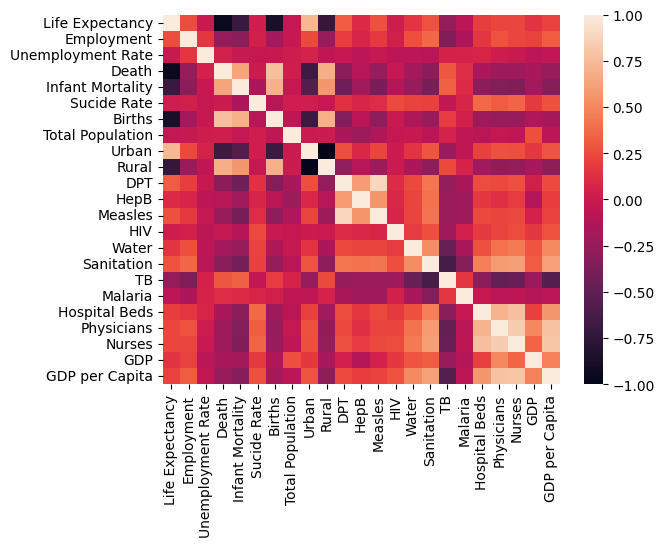

In [6]:
corrs = df.corr('spearman')
sns.heatmap(corrs)

## Scatter Plots

<Axes: xlabel='Infant Mortality', ylabel='Life Expectancy'>

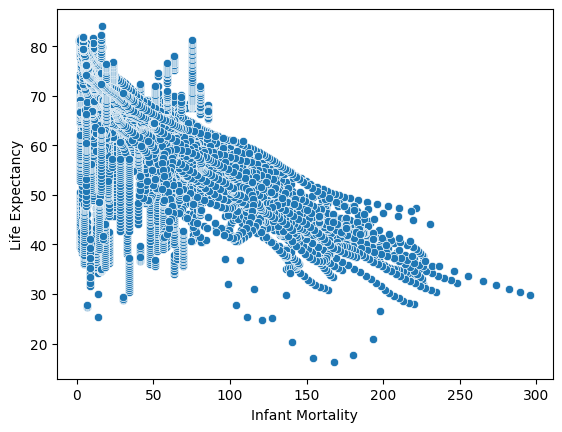

In [7]:
sns.scatterplot(df, x = "Infant Mortality", y = "Life Expectancy")

<Axes: xlabel='Births', ylabel='Life Expectancy'>

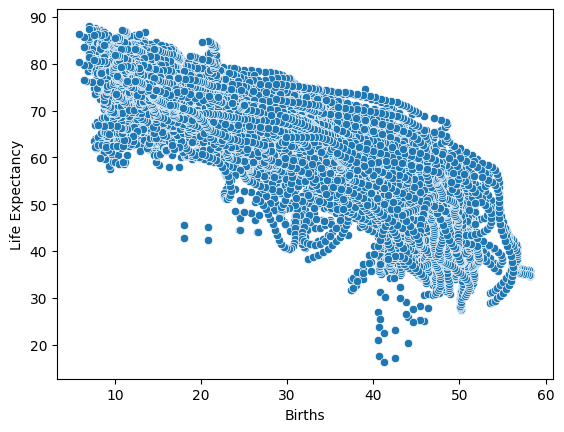

In [8]:
sns.scatterplot(df, x = "Births", y = "Life Expectancy")

<Axes: xlabel='Urban', ylabel='Life Expectancy'>

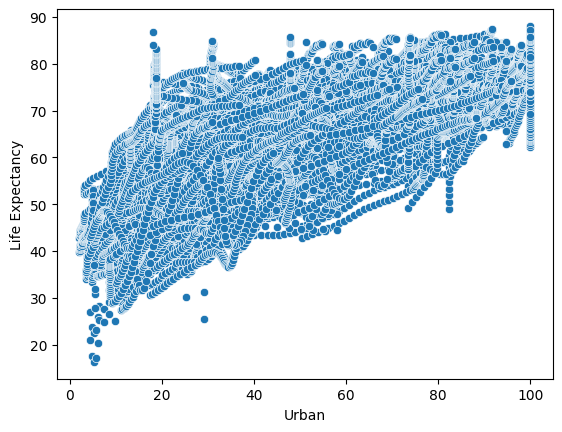

In [9]:
sns.scatterplot(df, x = "Urban", y = "Life Expectancy")

<Axes: xlabel='Rural', ylabel='Life Expectancy'>

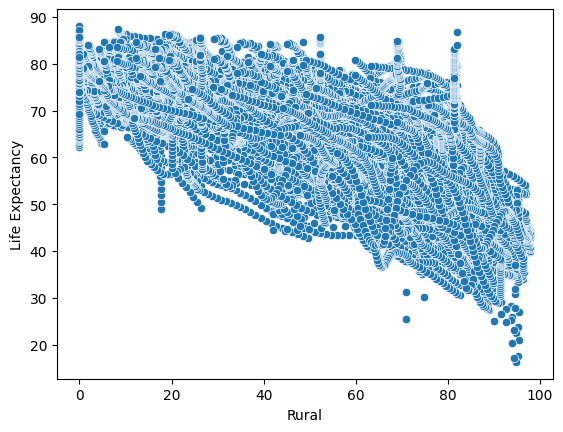

In [10]:
sns.scatterplot(df, x = "Rural", y = "Life Expectancy")

<Axes: xlabel='Physicians', ylabel='Nurses'>

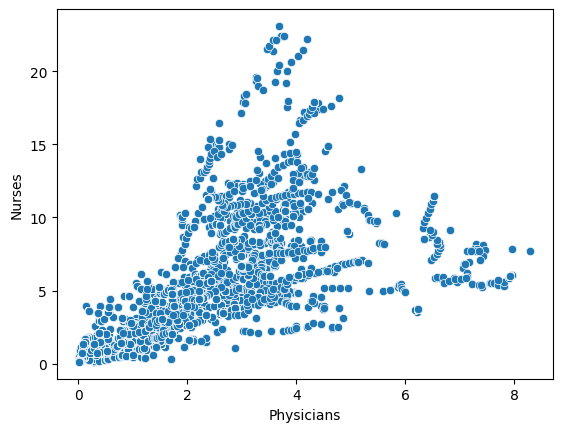

In [11]:
sns.scatterplot(df, x = "Physicians", y = "Nurses")

<Axes: xlabel='Nurses', ylabel='Malaria'>

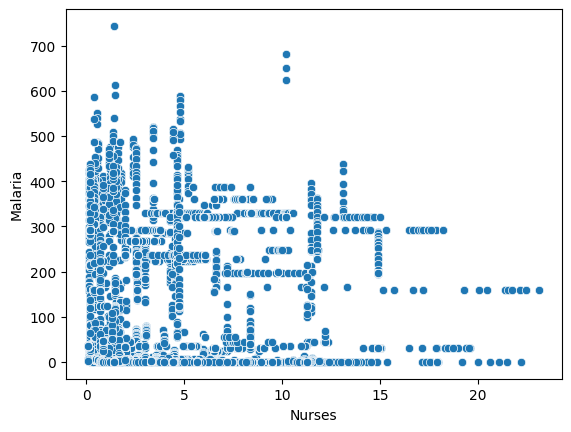

In [12]:
sns.scatterplot(df, x = "Nurses", y = "Malaria")

## Distributions

In [13]:
df.columns

Index(['Life Expectancy', 'Employment', 'Unemployment Rate', 'Death',
       'Infant Mortality', 'Sucide Rate', 'Births', 'Total Population',
       'Urban', 'Rural', 'DPT', 'HepB', 'Measles', 'HIV', 'Water',
       'Sanitation', 'TB', 'Malaria', 'Hospital Beds', 'Physicians', 'Nurses',
       'GDP', 'GDP per Capita'],
      dtype='object')

<Axes: xlabel='Life Expectancy', ylabel='Count'>

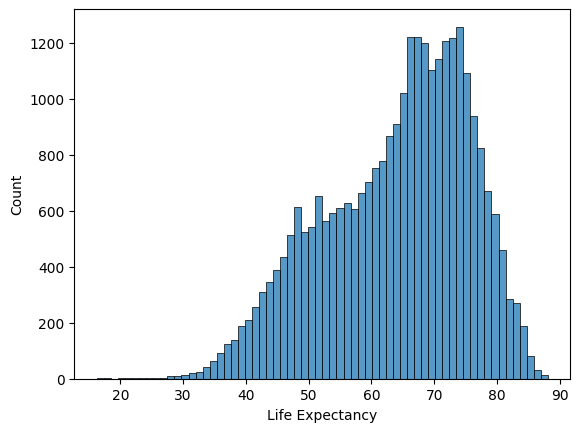

In [14]:
sns.histplot(df, x = "Life Expectancy")

<Axes: xlabel='Employment', ylabel='Count'>

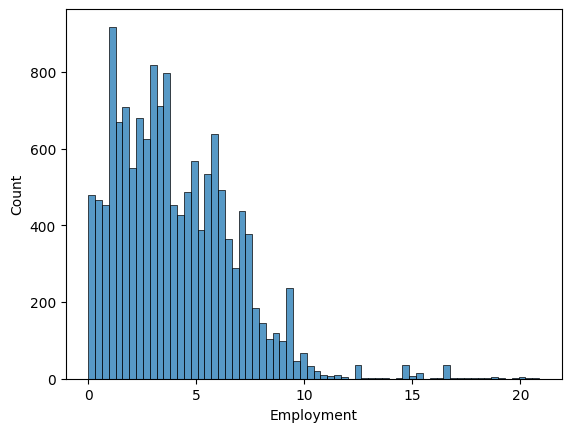

In [15]:
sns.histplot(df, x = "Employment")

<Axes: xlabel='Infant Mortality', ylabel='Count'>

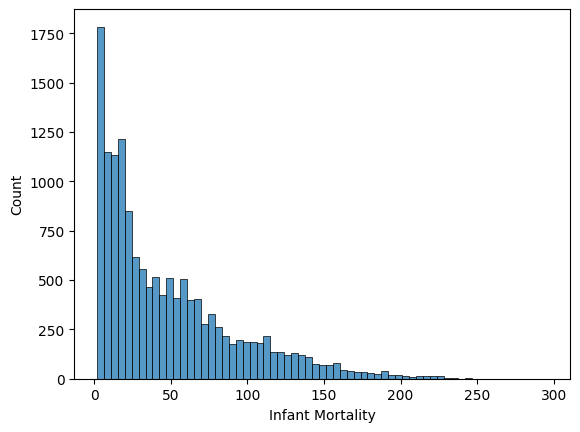

In [16]:
sns.histplot(df, x = "Infant Mortality")

<Axes: xlabel='Nurses', ylabel='Count'>

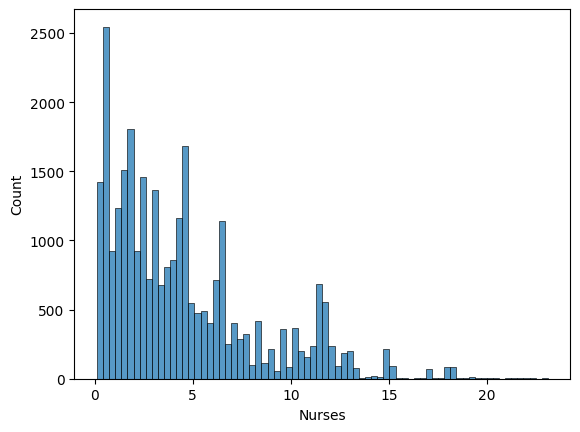

In [17]:
sns.histplot(df, x = "Nurses")

<Axes: xlabel='GDP per Capita', ylabel='Count'>

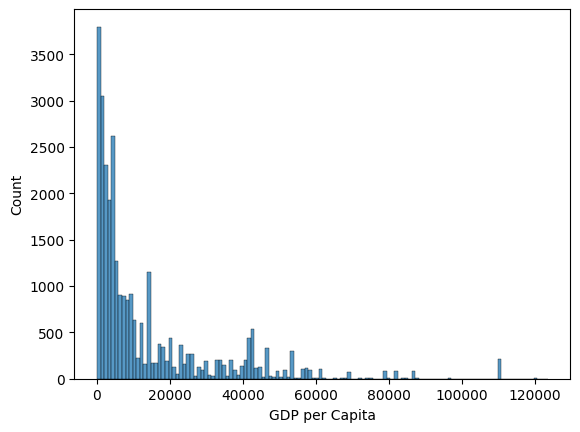

In [18]:
sns.histplot(df, x = "GDP per Capita")